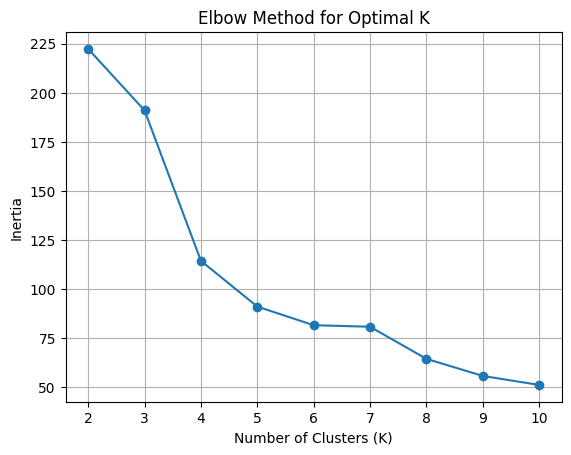

Cluster Centers (Scaled):
 [[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]

Silhouette Score: 0.4798814508199817


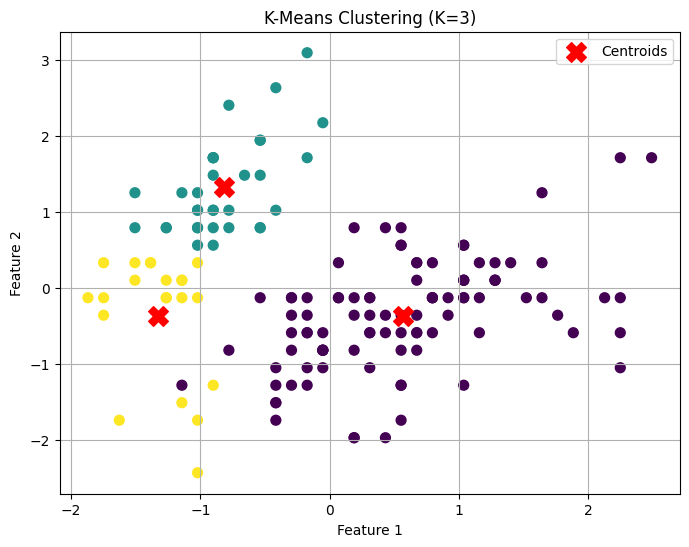

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# ------------------ Load Dataset ------------------
iris = load_iris()
X = iris.data

# If using your own dataset:
# df = pd.read_csv("your_data.csv")
# X = df[['feature1','feature2','feature3', ...]].values

# ------------------ Standardization ------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------ Elbow Method ------------------
inertia_values = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia_values.append(model.inertia_)

plt.plot(K, inertia_values, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# ------------------ K-Means Clustering ------------------
k = 3  # choose K after seeing elbow plot
model = KMeans(n_clusters=k, random_state=42)
clusters = model.fit_predict(X_scaled)

print("Cluster Centers (Scaled):\n", model.cluster_centers_)
print("\nSilhouette Score:", silhouette_score(X_scaled, clusters))

# ------------------ 2D Visualization ------------------
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering (K=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
